In [1]:
%pip install numpy 
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install seaborn 
%pip install xgboost
%pip install lightgbm
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 51.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 33.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 15.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df_train=pd.read_csv('data/train.csv')
df_store=pd.read_csv('data/store.csv')

/tmp/ipykernel_4209/1131126083.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('data/train.csv')


## Datacleaning

# train.csv

In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_train.columns=['store',
    'day_of_week',
    'date',
    'sales',
    'customers',
    'open',
    'promo',
    'state_holiday',
    'school_holiday']

In [6]:
df_train['state_holiday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Zu Klassifizieren mit '0':0;'a':1;'b':2;'c':3 

In [7]:
df_train['state_holiday']=df_train['state_holiday'].replace('0',0)
df_train['state_holiday']=df_train['state_holiday'].replace('a',1)
df_train['state_holiday']=df_train['state_holiday'].replace('b',2)
df_train['state_holiday']=df_train['state_holiday'].replace('c',3)

df_train['state_holiday']=df_train['state_holiday'].astype(int)

df_train['state_holiday'].unique()

array([0, 1, 2, 3])

'Date' als Datetime formatieren und Tag Monat und Jahr seperat auslesen.

In [8]:
df_train['date']=pd.to_datetime(df_train['date'])

df_train['year']=df_train['date'].dt.year

df_train['month']=df_train['date'].dt.month

df_train['day']=df_train['date'].dt.day

df_train['week_of_year']=df_train['date'].dt.weekofyear

/tmp/ipykernel_4209/2819681802.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week_of_year']=df_train['date'].dt.weekofyear


Zusatzlich Spalten für Monats- / Jahres- / Quartalsanfang / -ende anlegen.

In [9]:
df_train['is_month_end']=df_train['date'].dt.is_month_end

df_train['is_month_start']=df_train['date'].dt.is_month_start

df_train['is_quarter_end']=df_train['date'].dt.is_quarter_end

df_train['is_quarter_start']=df_train['date'].dt.is_quarter_start

df_train['is_year_end']=df_train['date'].dt.is_year_end

df_train['is_year_start']=df_train['date'].dt.is_year_start

# store.csv

In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]['CompetitionDistance'].unique()

array([1.070e+03, 3.100e+02, 3.270e+03, 3.240e+03, 1.040e+03, 2.300e+03,
       2.170e+03, 2.910e+03, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       2.050e+03, 2.256e+04, 7.660e+03, 2.500e+02, 1.130e+03, 4.840e+03,
       3.300e+02, 3.320e+03, 7.910e+03, 2.710e+03, 2.410e+03, 2.400e+02,
       1.669e+04, 1.462e+04, 8.980e+03, 1.793e+04, 2.440e+03, 6.190e+03,
       7.890e+03, 4.510e+03, 2.000e+03, 2.460e+03, 9.000e+02, 5.190e+03,
       1.540e+03, 1.657e+04, 2.800e+02, 8.540e+03, 1.780e+03, 1.642e+04,
       3.050e+03, 1.184e+04, 1.254e+04, 2.640e+03, 1.100e+02, 1.309e+04,
       4.130e+03, 3.770e+03, 1.710e+03, 4.800e+02, 1.390e+03, 9.670e+03,
       3.560e+03, 1.936e+04, 8.500e+02, 5.200e+02, 1.697e+04, 2.200e+02,
       2.026e+04, 3.800e+02, 6.870e+03, 1.500e+02, 1.900e+02, 3.150e+03,
       6.400e+02, 7.930e+03, 4.500e+02, 2.370e+03, 1.080e+04, 1.890e+03,
       4.370e+03, 3.200e+02, 6.100e+02, 7.800e+02, 1.310e+03, 3.520e+03,
       3.400e+02, 2.233e+04, 2.100e+02, 4.580e+03, 

In [12]:
df_store[df_store['Promo2']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1113
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      544 non-null    int64  
 1   StoreType                  544 non-null    object 
 2   Assortment                 544 non-null    object 
 3   CompetitionDistance        542 non-null    float64
 4   CompetitionOpenSinceMonth  396 non-null    float64
 5   CompetitionOpenSinceYear   396 non-null    float64
 6   Promo2                     544 non-null    int64  
 7   Promo2SinceWeek            0 non-null      float64
 8   Promo2SinceYear            0 non-null      float64
 9   PromoInterval              0 non-null      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 46.8+ KB


Die Werte für Promo2SinceWeek, Promo2SinceYear und PromoInterval sind genau dann Null, wenn Promo2==0 gilt.
Die Spalten mit Buchstaben auf numerische WErte umsetzen.

In [13]:
#set assortment to numeric values
df_store['Assortment'] = df_store['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

In [14]:
#set storetype to numeric values
df_store['StoreType'] = df_store['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})

df_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [15]:
#convert to snake case
df_store.columns = ['store',
 'storetype',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   store                         1115 non-null   int64  
 1   storetype                     1115 non-null   int64  
 2   assortment                    1115 non-null   int64  
 3   competition_distance          1112 non-null   float64
 4   competition_open_since_month  761 non-null    float64
 5   competition_open_since_year   761 non-null    float64
 6   promo2                        1115 non-null   int64  
 7   promo2_since_week             571 non-null    float64
 8   promo2_since_year             571 non-null    float64
 9   promo_interval                571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [16]:
#set promo_interval to numeric values
df_store['promo_interval'] = df_store['promo_interval'].map({'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3})



Heatmap um missing values zu visualisieren

<Axes: >

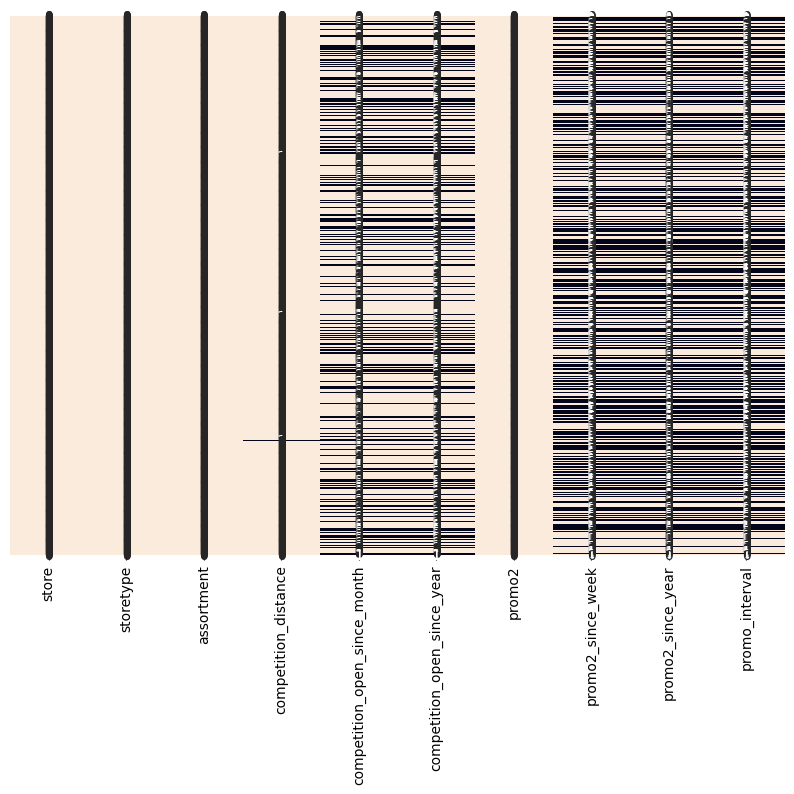

In [17]:
import seaborn as sb 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7)) 
sb.heatmap(df_store.isnull(),yticklabels=False, cbar=[], cmap='rocket_r', annot=True)





In [18]:
#fill missing values for promo2_since_week and promo2_since_year and promo_interval
df_store['promo2_since_week'] = df_store['promo2_since_week'].fillna(-1)
df_store['promo2_since_year'] = df_store['promo2_since_year'].fillna(-1)
df_store['promo_interval'] = df_store['promo_interval'].fillna(-1)




In [19]:
#fill missing values for competition_open_since_month and competition_open_since_year with mean
df_store['competition_open_since_month'] = df_store['competition_open_since_month'].fillna(df_store['competition_open_since_month'].mean())
df_store['competition_open_since_year'] = df_store['competition_open_since_year'].fillna(df_store['competition_open_since_year'].mean())
#also fill missing values for competition_distance with mean
df_store['competition_distance'] = df_store['competition_distance'].fillna(df_store['competition_distance'].mean())


Kontrolle

<Axes: >

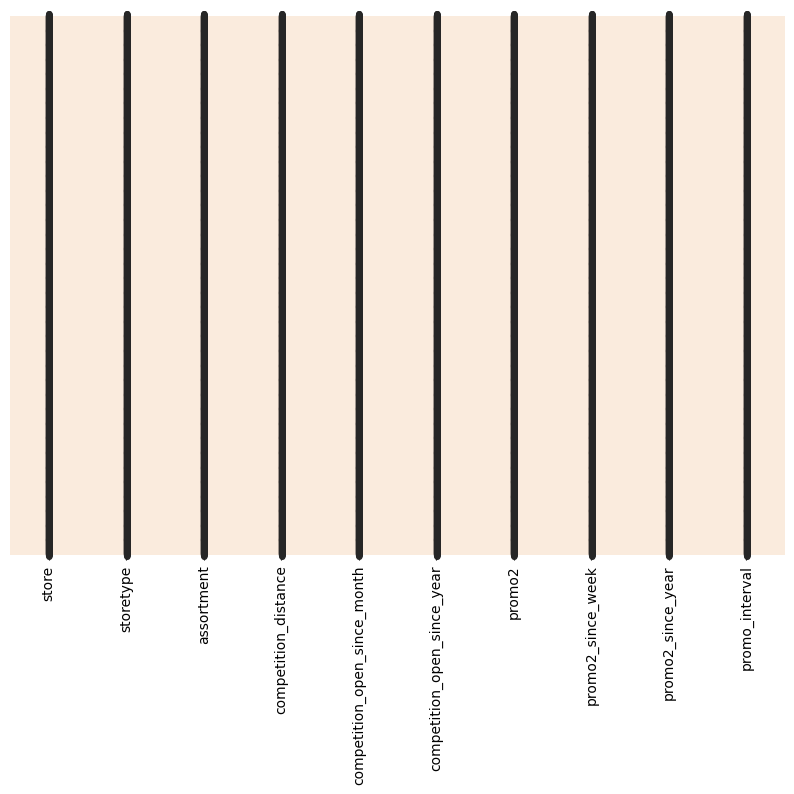

In [20]:
import seaborn as sb 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7)) 
sb.heatmap(df_store.isnull(),yticklabels=False, cbar=[], cmap='rocket_r', annot=True)

In [21]:
df_store.head()

,store,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


# merge train and store data

In [22]:
#merge train and store data
df_train_store = pd.merge(df_train, df_store, how='left', on='store')

In [23]:
df_train_store.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,year,...,is_year_start,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,False,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,False,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,False,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,False,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,False,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


In [24]:
#convert every column to float and drop those you cant convert to float
for col in df_train_store.columns:
    try:
        df_train_store[col] = df_train_store[col].astype(float)
    except:
        df_train_store.drop(col, axis=1, inplace=True)  



df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   store                         1017209 non-null  float64
 1   day_of_week                   1017209 non-null  float64
 2   sales                         1017209 non-null  float64
 3   customers                     1017209 non-null  float64
 4   open                          1017209 non-null  float64
 5   promo                         1017209 non-null  float64
 6   state_holiday                 1017209 non-null  float64
 7   school_holiday                1017209 non-null  float64
 8   year                          1017209 non-null  float64
 9   month                         1017209 non-null  float64
 10  day                           1017209 non-null  float64
 11  week_of_year                  1017209 non-null  float64
 12  is_month_end                

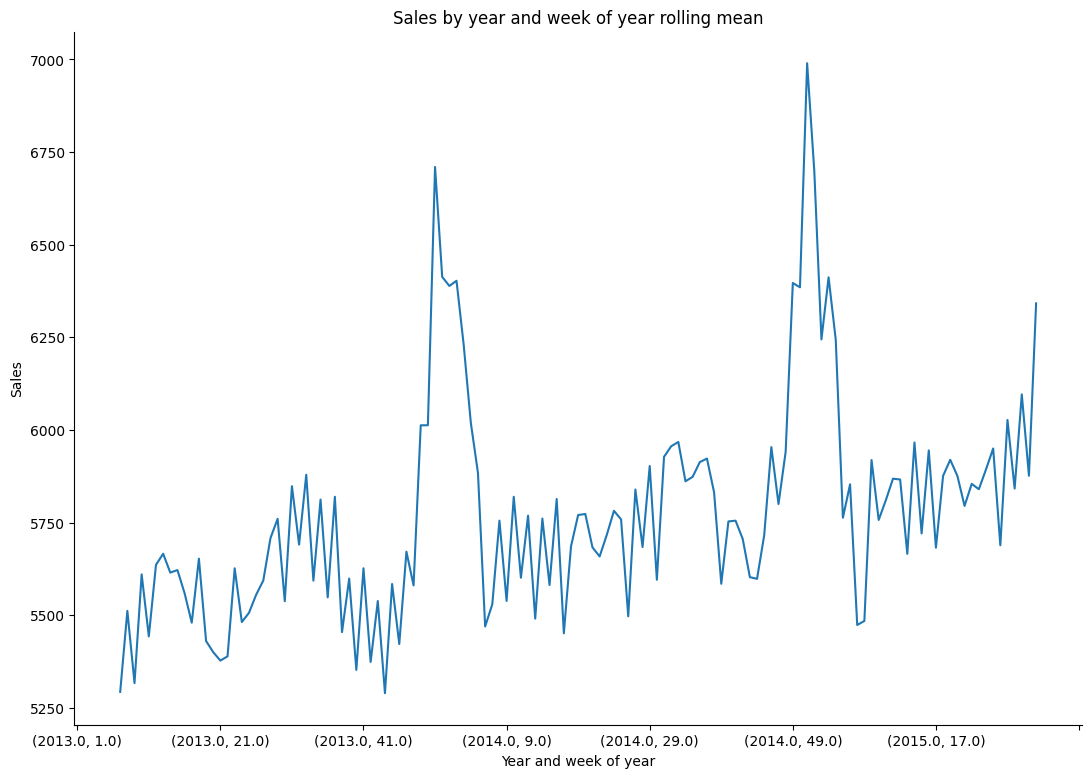

In [25]:
# plot sales by year and week of year rolling mean

df_train_store.groupby(['year','week_of_year'])['sales'].mean().rolling(7).mean().plot()
plt.title('Sales by year and week of year rolling mean')   
plt.xlabel('Year and week of year')
plt.ylabel('Sales')
#figsize increase 
plt.gcf().set_size_inches(13, 9)
#remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


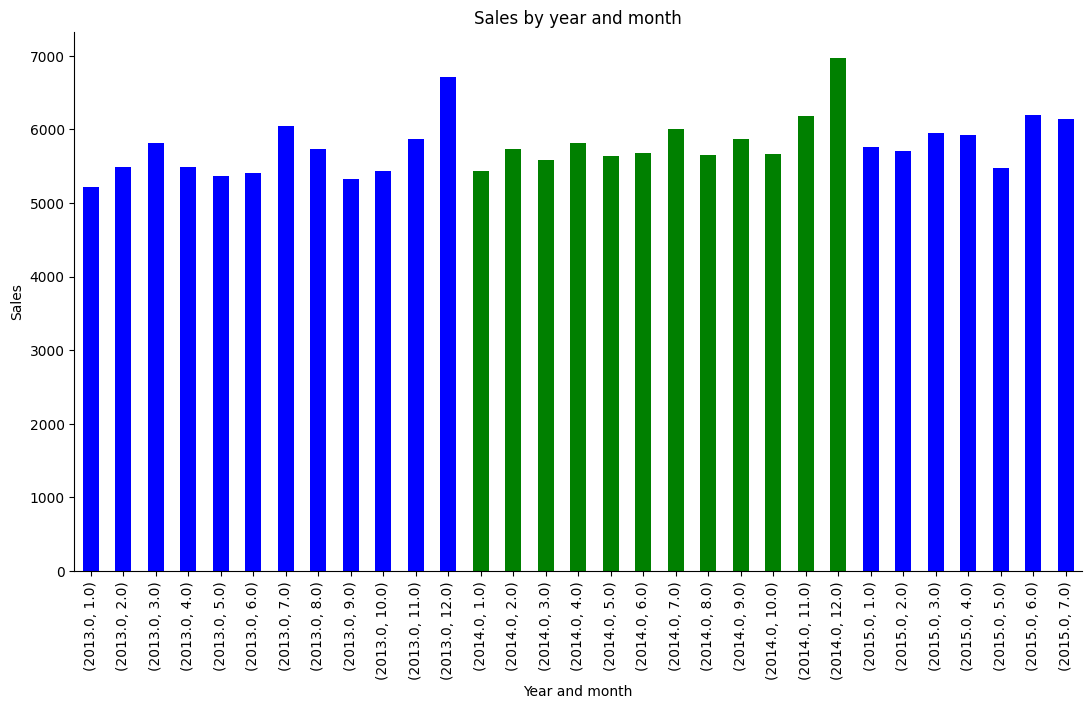

In [26]:
# plot sales by year and month as bar chart
colors = {2013: 'r', 2014: 'b', 2015: 'y'}
df_train_store.groupby(['year','month'])['sales'].mean().plot(kind='bar', color=['b' if i<12 else 'g' for i in range(0,24)])

plt.gcf().set_size_inches(13, 7)
plt.title('Sales by year and month')
plt.xlabel('Year and month')
plt.ylabel('Sales')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Um einen Überblick über die Stores zu bekommen, gucken welche art wie oft auftaucht

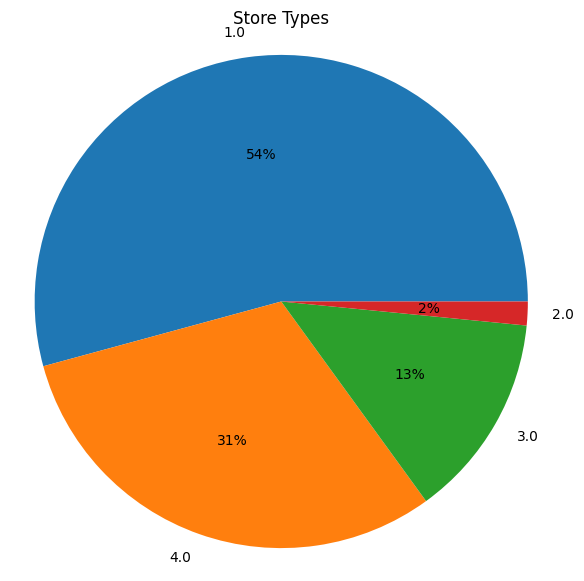

In [27]:
#make a pie chart of the different store types
df_train_store['storetype'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(7,7))
plt.axis('equal')
plt.title('Store Types')
plt.ylabel('')
plt.show()

 nochmal das gleiche für assortments

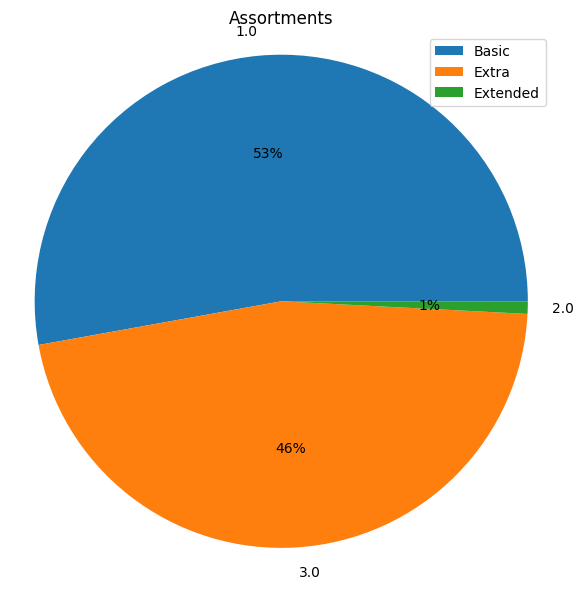

In [28]:
#create a pie chart of the different assortments
df_train_store['assortment'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(7,7))
plt.axis('equal')
plt.title('Assortments')
plt.ylabel('')
plt.legend(['Basic', 'Extra', 'Extended'])
plt.show()

Die Art "Extra" wird von Rossmann kaum eingesetzt. Fast ausschließlich basic oder extended

Plotten wie die Competitiondistance sich auf die Sales auswirkt

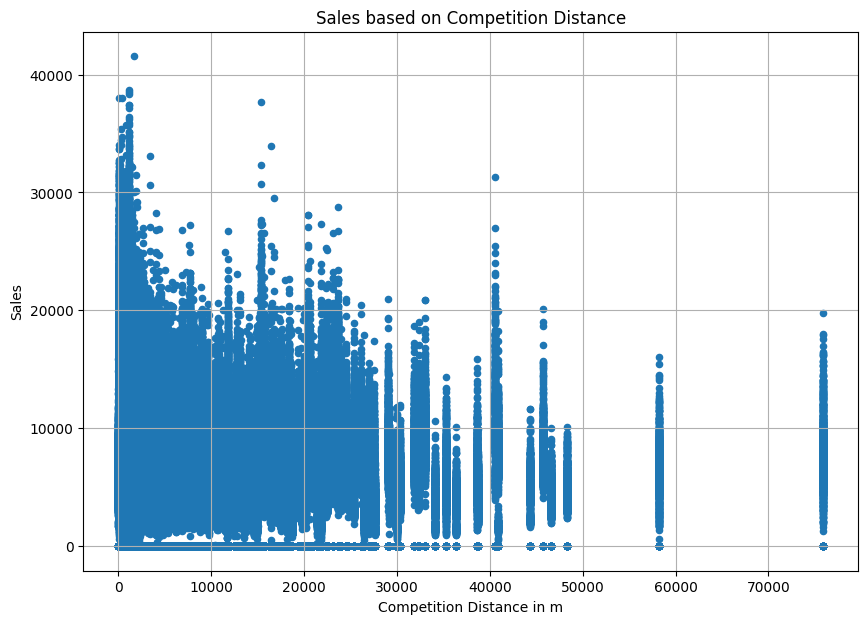

In [29]:
#plot the sales for each store based on the competition distance of the store as a scatter plot
df_train_store.plot.scatter(x='competition_distance', y='sales', figsize=(10,7))
plt.title('Sales based on Competition Distance')
plt.xlabel('Competition Distance in m')
plt.ylabel('Sales')
#use smaller dots to make the plot more readable and add a grid 
plt.scatter(x='competition_distance', y='sales', data=df_train_store, s=0.5)
plt.grid()
plt.show()

Habe keine schönere Methode für den Scatter Plotzu erstellen. Hier ist zu erkennen, dass niedrige Competition Distance mehr Sales mit sich bringt. Dies würde ich damit begründen, dass diese Rossmanns z.B in Einkaufszentren sitzen und somit sowieso viel besucht werden.

Außerdem möchte ich schauen, ob Stores mit nahe gelegener Competition mehr Werbung machen.

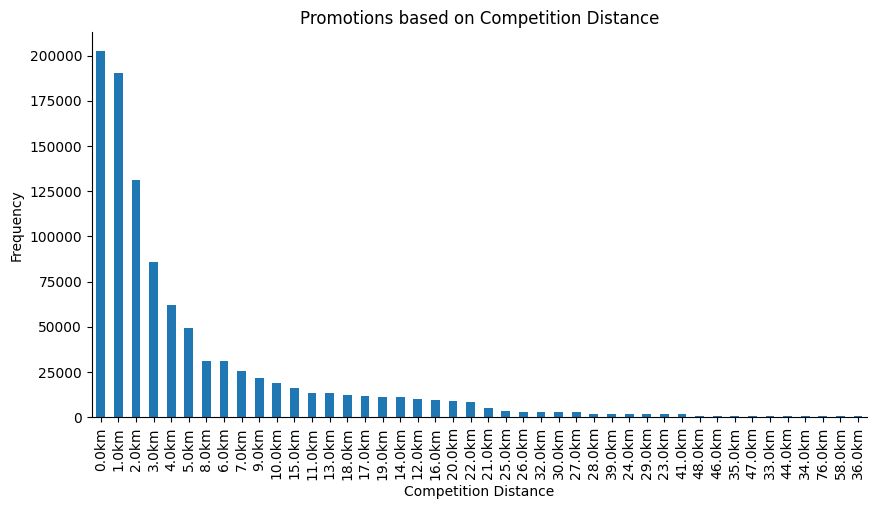

In [30]:
#create a plot showing the frequency of promotions based on competition distance
#first create a new column with the competition distance divided by 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')

#plot the frequency of promotions based on competition distance
df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Promotions based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
#remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()



Erstmal okay, aber nach einigen probieren gefällt Frequency nicht. Da der Wert von Frequency an sich nicht viel aussagt und wir nur wissen müssen, ob er hoch ist oder nicht; Weg mit dem Wert. Außerdem Kosmetik und unnötige Values raus.

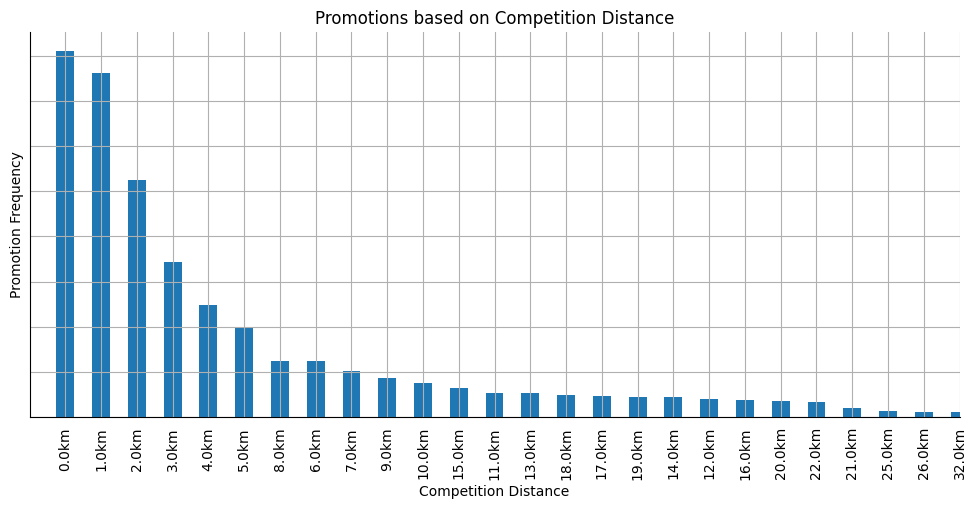

In [31]:
df_train_store['competition_distance_1000'] = df_train_store['competition_distance'] / 1000
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].round()
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].astype(str)
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'] + 'km'
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('0km', '0')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nankm', 'nan')
df_train_store['competition_distance_1000'] = df_train_store['competition_distance_1000'].replace('nan', '0')
df_train_store['competition_distance_1000'].value_counts().plot(kind='bar', figsize=(12,5))
plt.title('Promotions based on Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Promotion Frequency')
#remove the last 15 values of the x-axis
plt.xlim(-1, 25)
#remove the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#also remove the ticks on the y-axis and x-axis
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=True)
plt.grid()
plt.show()


JETZT HEATMAP UND DECISION TREE

/tmp/ipykernel_4209/2220985052.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train_store.corr()


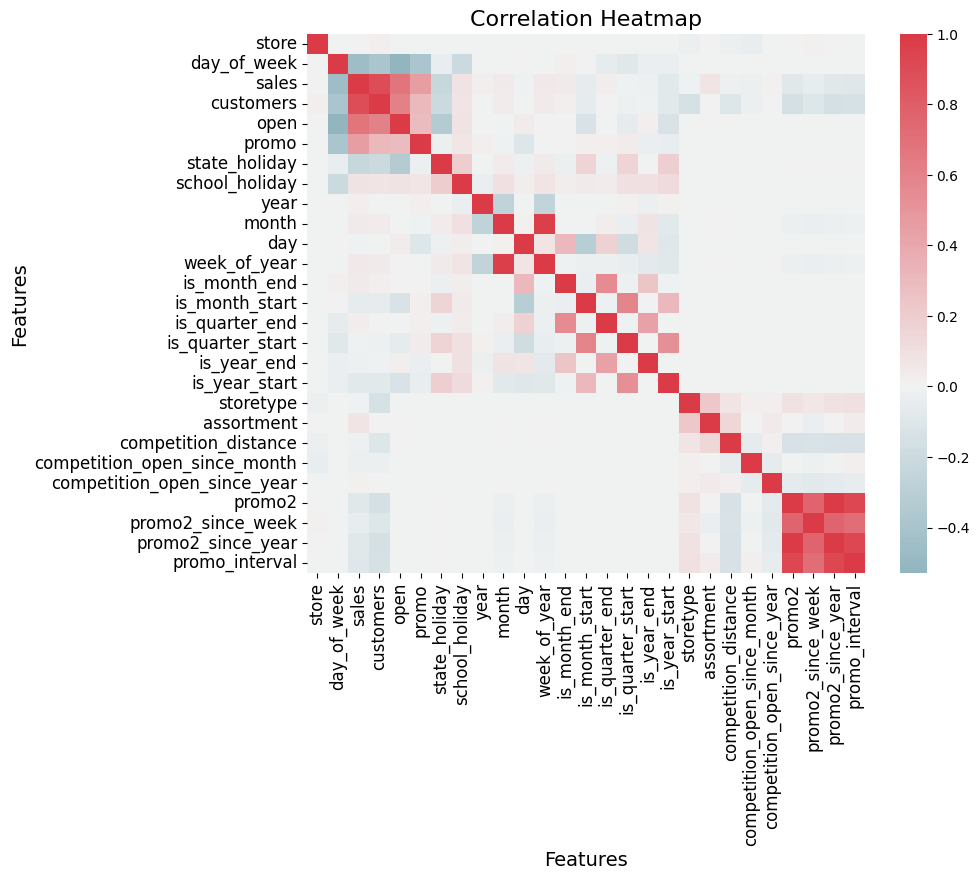

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the correlation matrix
corr = df_train_store.corr()

plt.figure(figsize=(9, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, cbar=True, center=0)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


## Vorhersagen der Verkäufe mithilfe von Maschinelearning-Verfahren

In [33]:
#import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
#knn
from sklearn.neighbors import KNeighborsRegressor
#ada boost
from sklearn.ensemble import AdaBoostRegressor
#svm
from sklearn.svm import SVR
#xgboost
from xgboost import XGBRegressor
#gradient boost
from sklearn.ensemble import GradientBoostingRegressor
#decision tree
from sklearn.tree import DecisionTreeRegressor
#random forest
from sklearn.ensemble import RandomForestRegressor
#linear regression 
from sklearn.linear_model import LinearRegression



In [34]:

#select features
features = corr['sales'][(corr['sales']>.02) | (corr['sales']<-.02)].index
features = features.drop('sales')

#select target
target = 'sales'

#limit dataset to 100000 rows at random
df_train_store_sample = df_train_store.sample(n=100000, random_state=42)

#split data into train and test
x_train_sample, x_test_sample, y_train_sample, y_test_sample = train_test_split(df_train_store_sample[features], df_train_store_sample[target], test_size=0.2, random_state=42)

In [35]:
#predict sales knn  regression
#instantiate model
knn = KNeighborsRegressor()

#fit model
knn.fit(x_train_sample,y_train_sample)

#predict
knn_y_pred = knn.predict(x_test_sample)

#calculate mean squared error

print(mean_squared_error(y_test_sample, knn_y_pred))

#calculate r2 score
knn_r2 = r2_score(y_test_sample, knn_y_pred)
print(knn_r2)

2451634.4712199997
0.8376855944265323


Die Actual vs Predicted Sales plotten

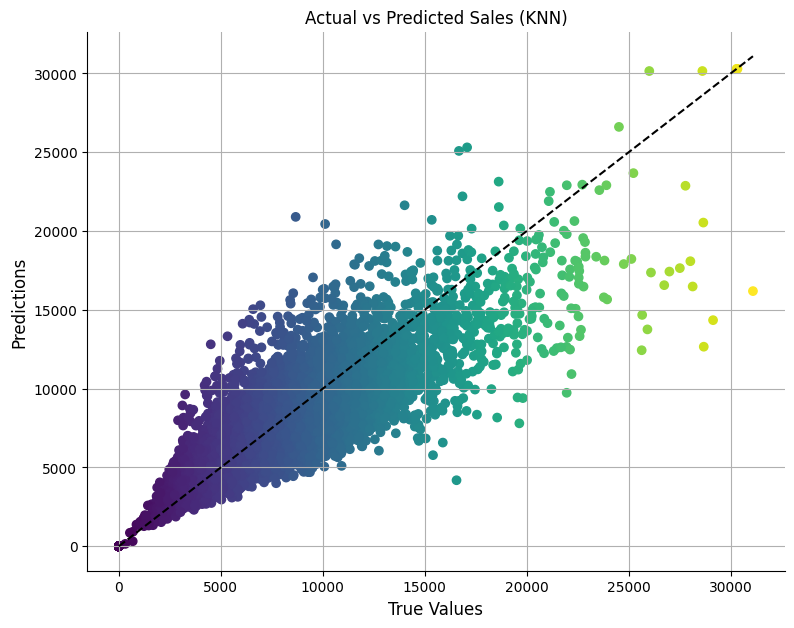

In [36]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(y_test_sample, knn_y_pred, c=y_test_sample, cmap='viridis')
ax.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], ls='--', color='black')
ax.set_xlabel('True Values', fontsize=12)
ax.set_ylabel('Predictions', fontsize=12)
ax.set_title('Actual vs Predicted Sales (KNN)')
#add a grid and remove the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.grid()
plt.show()


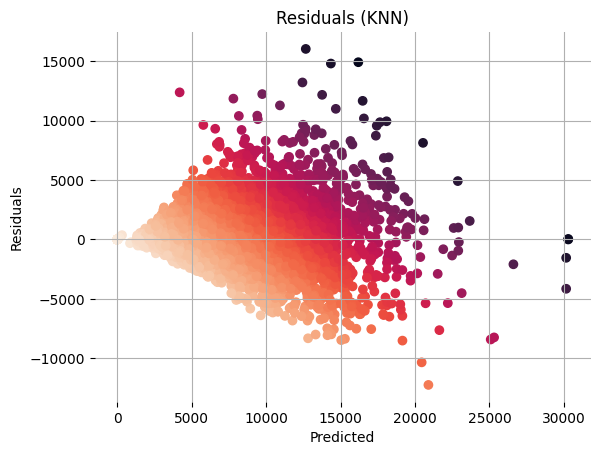

In [37]:
#plot residuals
plt.scatter(knn_y_pred, y_test_sample-knn_y_pred, c=y_test_sample, cmap='rocket_r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals (KNN)')
plt.box(False)
#add a grid
plt.grid()
plt.show()


In [38]:
#predict sales adaboost regression
#instantiate model
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100)

#fit model
ada.fit(x_train_sample,y_train_sample)

#predict
ada_y_pred = ada.predict(x_test_sample)

#calculate mean squared error
print(mean_squared_error(y_test_sample, ada_y_pred))

#calculate r2 score
ada_r2 = r2_score(y_test_sample, ada_y_pred)
print(ada_r2)

2186.1680687794906
0.6835767113745779


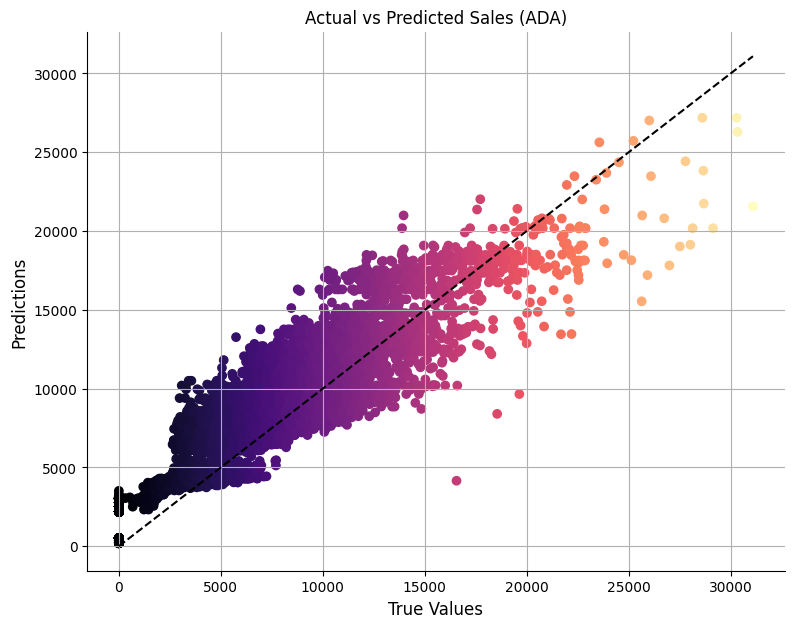

In [39]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(y_test_sample, ada_y_pred, c=y_test_sample, cmap='magma')
ax.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], ls='--', color='black')
ax.set_xlabel('True Values', fontsize=12)
ax.set_ylabel('Predictions', fontsize=12)
ax.set_title('Actual vs Predicted Sales (ADA)')
#add a grid and remove the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.grid()
plt.show()


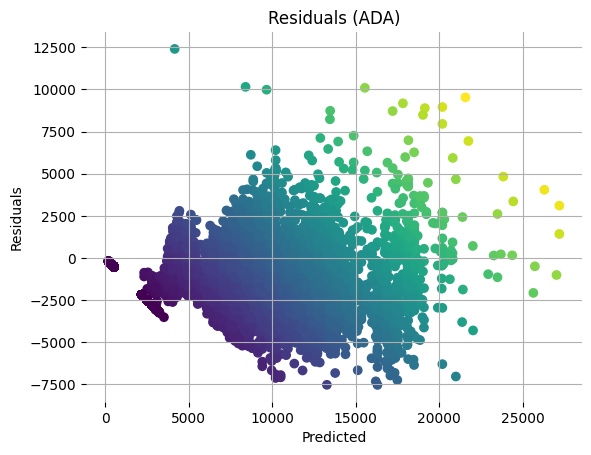

In [40]:
#plot residuals
plt.scatter(ada_y_pred, y_test_sample-ada_y_pred, c=y_test_sample, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals (ADA)')
plt.box(False)
#add a grid
plt.grid()
plt.show()


In [41]:
#predict sales svm regression
#instantiate model
svm = SVR()

#fit model
svm.fit(x_train_sample,y_train_sample)

#predict
svm_y_pred = svm.predict(x_test_sample)

#calculate mean squared error
print(mean_squared_error(y_test_sample, svm_y_pred))

#calculate r2 score
svm_r2 = r2_score(y_test_sample, svm_y_pred)
print(svm_r2)

2494.715570709798
0.5879561637924766


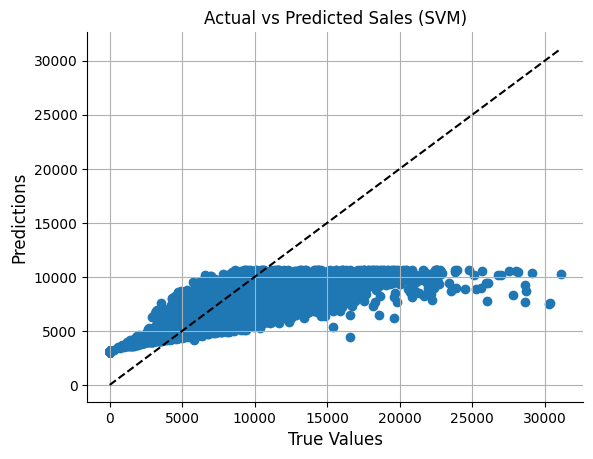

In [42]:
#plot actual vs predicted
plt.scatter(y_test_sample, svm_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
#remove the top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#add a title
plt.title('Actual vs Predicted Sales (SVM)')
plt.grid()
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], ls='--', color='black')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.show()



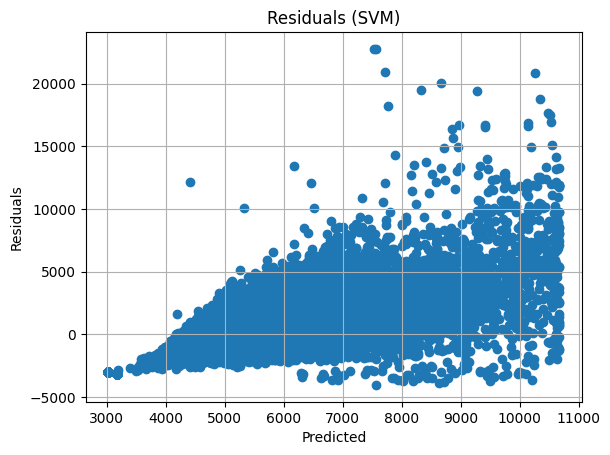

In [43]:
#plot residuals
plt.scatter(svm_y_pred, y_test_sample-svm_y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals (SVM)')
plt.grid()
plt.show()

In [44]:
#predict sales xgboost regression
#instantiate model
xgb = XGBRegressor()

#fit model
xgb.fit(x_train_sample,y_train_sample)

#predict
xgb_y_pred = xgb.predict(x_test_sample)

#calculate mean squared error
print(mean_squared_error(y_test_sample, xgb_y_pred))

#calculate r2 score
xgb_r2 = r2_score(y_test_sample, xgb_y_pred)
print(xgb_r2)

993.3300317325451
0.9346736372386841


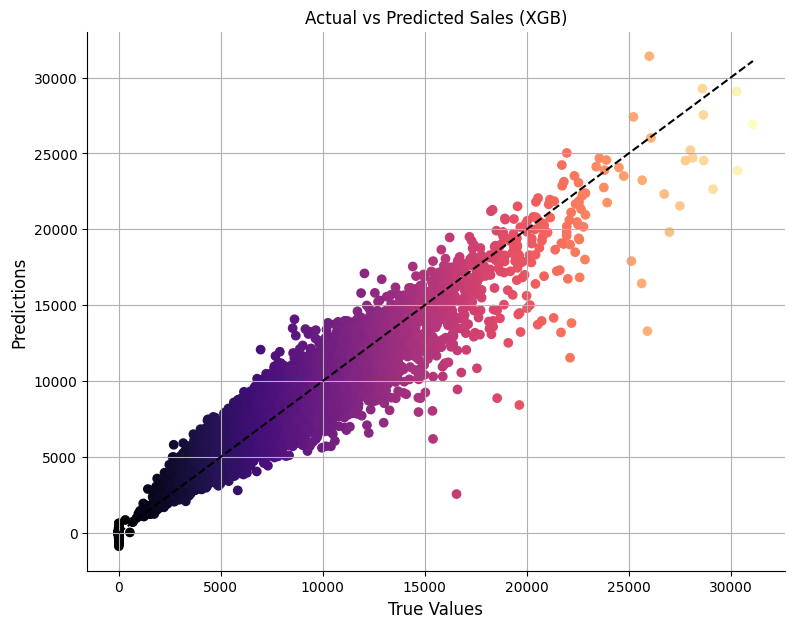

In [75]:
#plot actual vs predicted sales as scatter plot with regression line
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(y_test_sample, xgb_y_pred, c=y_test_sample, cmap='magma')
ax.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], ls='--', color='black')
ax.set_xlabel('True Values', fontsize=12)
ax.set_ylabel('Predictions', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Actual vs Predicted Sales (XGB)')
plt.grid()


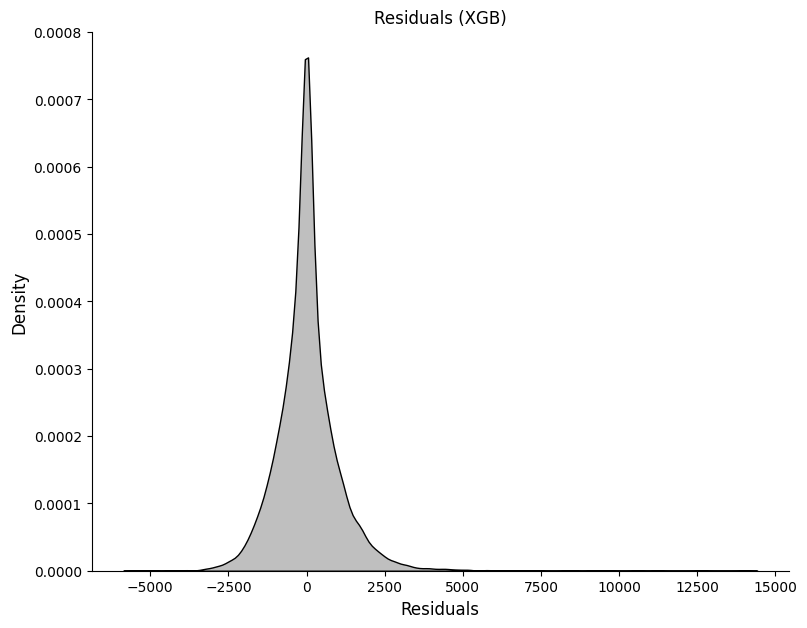

In [88]:
#plot residuals as a density plot
fig, ax = plt.subplots(figsize=(9, 7))
sns.kdeplot(y_test_sample-xgb_y_pred, fill=True, color='black')
ax.set_xlabel('Residuals', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Residuals (XGB)')
plt.show()

gute Genauigkeit; Die Residuals sind größtenteils bei 0

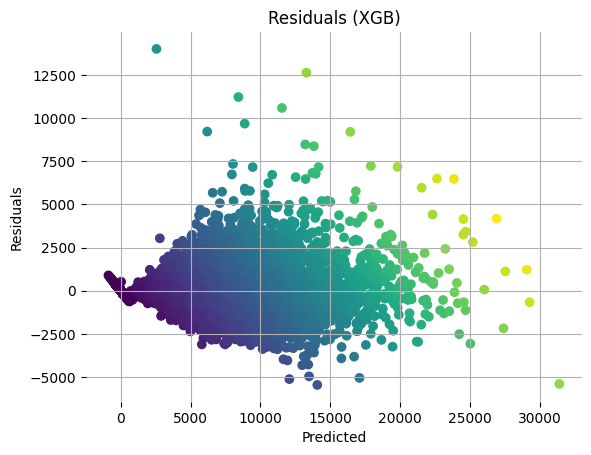

In [90]:
#plot residuals
plt.scatter(xgb_y_pred, y_test_sample-xgb_y_pred, c=y_test_sample, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals (XGB)')
plt.box(False)
#add a grid
plt.grid()
plt.show()

In [47]:
#predict sales using gradient boosting regression
#instantiate model
gb = GradientBoostingRegressor()

#fit model
gb.fit(x_train_sample,y_train_sample)

#predict
gb_y_pred = gb.predict(x_test_sample)

#calculate mean squared error
print(mean_squared_error(y_test_sample, gb_y_pred))

#calculate r2 score
gb_r2 = r2_score(y_test_sample, gb_y_pred)
print(gb_r2)

1187.0342574793722
0.9067115554268012


Text(0, 0.5, 'Predicted')

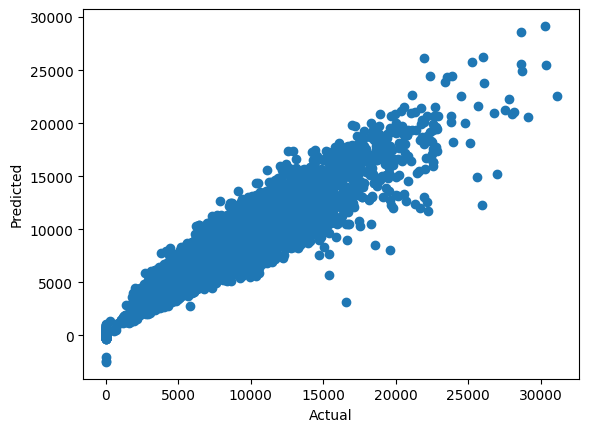

In [48]:
#plot actual vs predicted
plt.scatter(y_test_sample, gb_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Residuals')

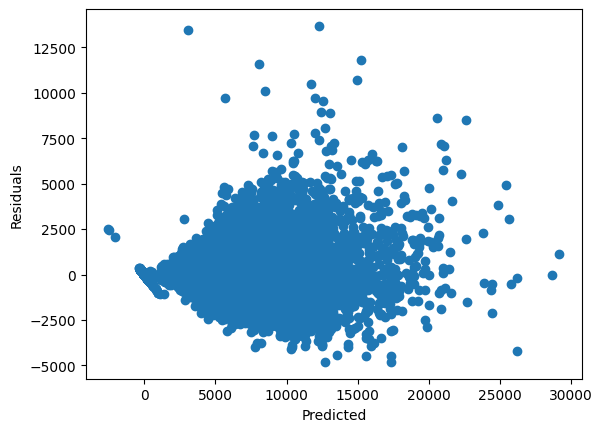

In [49]:
#plot residuals
plt.scatter(gb_y_pred, y_test_sample-gb_y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')

In [50]:
#DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train_sample, y_train_sample)
dtr_y_pred = dtr.predict(x_test_sample)

print('Mean Squared Error: ', mean_squared_error(y_test_sample, dtr_y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_sample, dtr_y_pred))
dtr_r2 = r2_score(y_test_sample, dtr_y_pred)
print('R2 Score: ', dtr_r2)

Mean Squared Error:  2122028.5397125
Mean Absolute Error:  924.226725
R2 Score:  0.859507685555601


In [51]:
#predict sales with random forest regressor 
#limit max depth to prevent kernel crashes
rfr = RandomForestRegressor(n_estimators=100, max_depth=10)
rfr.fit(x_train_sample, y_train_sample)
rfr_y_pred = rfr.predict(x_test_sample)
print('Mean Squared Error: ', mean_squared_error(y_test_sample, rfr_y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_sample, rfr_y_pred))
rfr_r2 = r2_score(y_test_sample, rfr_y_pred)
print('R2 Score: ', rfr_r2)

Mean Squared Error:  1357476.870334259
Mean Absolute Error:  776.6233012276351
R2 Score:  0.9101260592169802


In [52]:
#predict sales with linear regression 
lr = LinearRegression()
lr = lr.fit(x_train_sample, y_train_sample)
lr_y_pred = lr.predict(x_test_sample)
print('Mean Squared Error: ', mean_squared_error(y_test_sample, lr_y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_sample, lr_y_pred))
lr_r2 = r2_score(y_test_sample, lr_y_pred)
print('R2 Score: ', lr_r2)

Mean Squared Error:  2142308.9067694345
Mean Absolute Error:  977.6220062787763
R2 Score:  0.8581649912174765


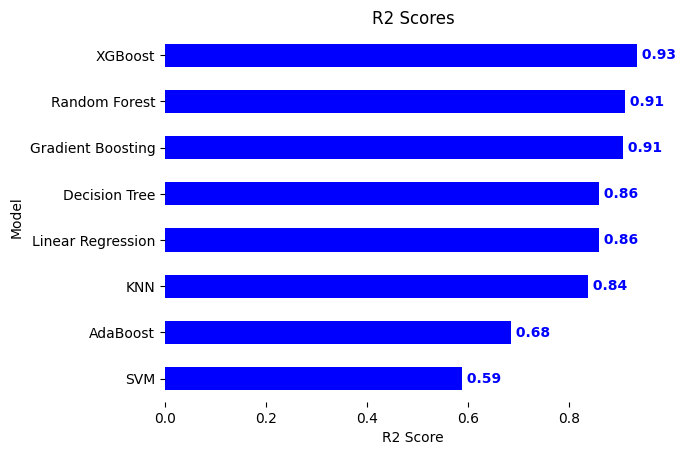

In [53]:
#plot r2 scores
r2_scores = [['KNN',knn_r2],['AdaBoost',ada_r2],['SVM',svm_r2],['XGBoost',xgb_r2],['Gradient Boosting',gb_r2],['Decision Tree',dtr_r2],['Random Forest',rfr_r2],['Linear Regression',lr_r2]]
r2_scores_df = pd.DataFrame(r2_scores, columns=['Model','R2 Score'])
#sort by r2 score
r2_scores_df.sort_values(by='R2 Score', inplace=True)
#plot as ranked numbered horizontal bar chart 
r2_scores_df.plot.barh(x='Model', y='R2 Score', legend=False, title='R2 Scores', color='blue')
#number the based on rank
for i, v in enumerate(r2_scores_df['R2 Score']):
    plt.text(v, i, " "+str(round(v,2)), color='blue', va='center', fontweight='bold')
plt.xlabel('R2 Score')
plt.ylabel('Model')

plt.box(False)

## Hyperparameter tuning

In [ ]:
#xgb hyperparameter tuning with gridsearchcv
#instantiate model
xgb = XGBRegressor()

#set parameters
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'colsample_bylevel': [0.5, 0.7, 1.0]
}

#instantiate gridsearchcv
xgb_grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1, verbose=1)

#fit model
xgb_grid.fit(x_train_sample, y_train_sample)

#best parameters
print(xgb_grid.best_params_)
#best score
print(xgb_grid.best_score_)
#save best parameters as file
with open('xgb_grid_best_params.txt', 'a') as f:
    f.write(str(xgb_grid.best_params_))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'colsample_bylevel': 0.7, 'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
0.9370402225075718


In [ ]:
#previous best parameters xgb_grid_best_params.txt
#xgb hyperparameter tuning with gridsearchcv
#instantiate model
xgb = XGBRegressor()

#set parameters
params = {
    'n_estimators': [250,275,300],
    'max_depth': [6,7,8],
    'colsample_bylevel': [0.7,0.8,0.9]
}

#instantiate gridsearchcv
xgb_grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1, verbose=1)

#fit model
xgb_grid.fit(x_train_sample, y_train_sample)

#best parameters
print(xgb_grid.best_params_)
#best score
print(xgb_grid.best_score_)
#save best parameters as file
with open('xgb_grid_best_params.txt', 'a') as f:
    f.write('\n'+str(xgb_grid.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'colsample_bylevel': 0.9, 'max_depth': 6, 'n_estimators': 275}
0.9357554945651602


In [ ]:
#random forest hyperparameter tuning with gridsearchcv
#instantiate model
rfr = RandomForestRegressor()

#set parameters
params = {
    'n_estimators': [150,200,250],
    'max_depth': [10,12,14],
    'min_samples_split': [80,90,100,110,120]
}

#instantiate gridsearchcv
rfr_grid = GridSearchCV(rfr, params, cv=5, n_jobs=-1, verbose=1)

#fit model
rfr_grid.fit(x_train_sample, y_train_sample)

#best parameters
print(rfr_grid.best_params_)
#best score
print(rfr_grid.best_score_)
#save best parameters to file
with open('rfr_best_params.txt', 'a') as f:
    #new line character
    f.write('\n'+str(rfr_grid.best_params_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'max_depth': 14, 'min_samples_split': 80, 'n_estimators': 150}
0.9134763632072683


In [ ]:
#baesd best Parameters of last fit xgb_grid_best_params.txt
#random forest hyperparameter tuning with gridsearchcv
#instantiate model
rfr = RandomForestRegressor()

#set parameters
params = {
    'n_estimators': [100,125,150],
    'max_depth': [16,18,20],
    'min_samples_split': [60,70,80]
}

#instantiate gridsearchcv
rfr_grid = GridSearchCV(rfr, params, cv=5, n_jobs=-1, verbose=1)

#fit model
rfr_grid.fit(x_train_sample, y_train_sample)

#best parameters
print(rfr_grid.best_params_)
#best score
print(rfr_grid.best_score_)
#save best parameters to file in new line
with open('rfr_best_params.txt', 'a') as f:
    f.write('\n'+str(rfr_grid.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 20, 'min_samples_split': 60, 'n_estimators': 150}
0.9164451363499566


In [ ]:
#gradient boosting hyperparameter tuning with gridsearchcv
#instantiate model
gb = GradientBoostingRegressor()

#set parameters
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

#instantiate gridsearchcv
gb_grid = GridSearchCV(gb, params, cv=5, n_jobs=-1, verbose=1)

#fit model
gb_grid.fit(x_train_sample, y_train_sample)

#best parameters
print(gb_grid.best_params_)
#best score
print(gb_grid.best_score_)
#save best parameters to file
with open('gb_best_params.txt', 'a') as f:
    f.write(str(gb_grid.best_params_))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'learning_rate': 0.1, 'max_depth': 7, 'max_features': 0.7, 'n_estimators': 300, 'subsample': 1.0}
0.9369242749794953


In [ ]:
#gradient boosting hyperparameter tuning with gridsearchcv
#based on previous best parameters see last row in gb_best_params.txt
#instantiate model
gb = GradientBoostingRegressor()

#set parameters
params = {
    'n_estimators': [175,200,225],
    'max_depth': [7,8,9],
    'max_features': [0.6],
}

#instantiate gridsearchcv
gb_grid = GridSearchCV(gb, params, cv=5, n_jobs=-1, verbose=1)

#fit model
gb_grid.fit(x_train_sample, y_train_sample)

#best parameters
print(gb_grid.best_params_)
#best score
print(gb_grid.best_score_)
#save best parameters to file
with open('gb_best_params.txt', 'a') as f:
    f.write('\n'+str(gb_grid.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 9, 'max_features': 0.6, 'n_estimators': 225}
0.9380900313376082


# Trainieren mit den komplettem Datensatz 

In [ ]:
#split data into train and test
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(df_train_store[features], df_train_store[target], test_size=0.2, random_state=42)

In [ ]:
#xgb train on all data
# set parameters
params = {'colsample_bylevel': 0.9, 'max_depth': 6, 'n_estimators': 275}

#instantiate model
xgb_all = XGBRegressor(**params)

# fit model
xgb_all.fit(x_train_all, y_train_all)

#print r2 score
print('R2 Score: ', r2_score(y_test_all, xgb_all.predict(x_test_all)))


R2 Score:  0.9445415121852796


In [ ]:
#random forest train on all data
# set parameters
params = {'max_depth': 20, 'min_samples_split': 60, 'n_estimators': 150}

#instantiate model
rfr_all = RandomForestRegressor(**params)

# fit model
rfr_all.fit(x_train_all, y_train_all)

#print r2 score
print('R2 Score: ', r2_score(y_test_all, rfr_all.predict(x_test_all)))

R2 Score:  0.9400644725858457


In [ ]:
#gradient boosting train on all data
# set parameters
params = {'max_depth': 9, 'max_features': 0.6, 'n_estimators': 225}

#instantiate model
gb_all = GradientBoostingRegressor(**params)

# fit model
gb_all.fit(x_train_all, y_train_all)


#print r2 score
print('R2 Score: ', r2_score(y_test_all, gb_all.predict(x_test_all)))

R2 Score:  0.9470207013172834
